In [1]:
//%jsroot on

In [2]:
const double PPAC3_Z = -84.2-188;
const double PPAC2_Z = -206.2-188;
const double PPAC1_Z = -504.2-188;

In [3]:
int start = 650;
int stop = 650;
TChain *fch;
fch = new TChain("tree", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/tele/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());}

TCanvas *c1=new TCanvas;

In [4]:
void SetTrace(TH2I *h,Double_t k,Double_t b){
        if(h==0) return;

        Int_t nbin  = h->GetNbinsX();
        Double_t zmin = h->GetXaxis()->GetXmin();
        Double_t zmax = h->GetXaxis()->GetXmax();
        for(int i=0;i<nbin;i++){
                Double_t nowz = zmin+(zmax-zmin)*i/nbin;
                Double_t nowf = nowz*k+b;
                h->Fill(nowz,nowf);
        }
}


In [5]:
   Double_t xzTrack[3] = {PPAC1_Z,PPAC2_Z,PPAC3_Z};
   Double_t yzTrack[3] = {PPAC1_Z,PPAC2_Z,PPAC3_Z};
   Double_t xTrack[3]={0,0,0};
   Double_t yTrack[3]={0,0,0};
   Double_t tx=0.,ty=0.;
   UShort_t t0_d1_xs[5],t0_d1_ys[5];
   UShort_t        t0d1_xhit;
   UShort_t        t0d1_yhit;
   UShort_t        t0d2_xhit;
   UShort_t        t0d2_yhit;

   Double_t xfpx[3],xfpy[3],xpCh[3][5][2];
   Double_t t0_d1_xce[5],t0_d2_xce[5];

   TBranch        *b_xfpx;   //!
   TBranch        *b_xfpy;   //!
   TBranch        *b_xpCh;   //!
   TBranch        *b_t0_d1_xs;   //!
   TBranch        *b_t0_d1_ys;   //!
   TBranch        *b_t0d1_xhit;   //!
   TBranch        *b_t0d1_yhit;   //!
   TBranch        *b_t0d2_xhit;   //!
   TBranch        *b_t0d2_yhit;   //!
   TBranch        *b_t0_d1_xce;   //!
   TBranch        *b_t0_d2_xce;   //!

        TH2I* hxz = new TH2I("hxz","Projection of X-Z",200,-750,200,200,-60,60);
        hxz->SetStats(kFALSE);
        TH2I* hyz = new TH2I("hyz","Projection of Y-Z",200,-750,200,200,-60,60);
        hyz->SetStats(kFALSE);

        TH2I* htarget = new TH2I("htarget","target",120,-30,30,120,-30,30);
        htarget->SetStats(kFALSE);

        TH1F *htargetx = new TH1F("htargetx","htargetx",120,-30,30);
        TH1F *htargety = new TH1F("htargety","htargety",120,-30,30);

In [6]:
        Double_t ppacxoffset[3][809];
        Double_t ppacyoffset[3][809];

        for(Int_t ii=0;ii<3;ii++){
                for(Int_t jj=0;jj<809;jj++){
                        ppacxoffset[ii][jj]=0;
                        ppacyoffset[ii][jj]=0;
                }
        }


        ifstream read1;
        read1.open("/data/d1/zhuhy/lanzhou2022/getdatappac/paras/ppacoffset.txt", ios::in);

        if(!read1.is_open()){
                cout<<" Cannot find calikbParas"<<endl;
                return;
        }
        Int_t prunnum=0;
        while(!read1.eof()){
                read1>>prunnum;
                read1>>ppacxoffset[0][prunnum]>>ppacyoffset[0][prunnum]>>ppacxoffset[1][prunnum]>>ppacyoffset[1][prunnum]>>ppacxoffset[2][prunnum]>>ppacyoffset[2][prunnum];
        }
        read1.close();


In [7]:
   fch->SetBranchAddress("xfpx[3]", xfpx, &b_xfpx);
   fch->SetBranchAddress("xfpy[3]", xfpy, &b_xfpy);
   fch->SetBranchAddress("xpCh[3][5][2]", xpCh, &b_xpCh);
   fch->SetBranchAddress("t0_d1_xs[5]", t0_d1_xs, &b_t0_d1_xs);
   fch->SetBranchAddress("t0_d1_ys[5]", t0_d1_ys, &b_t0_d1_ys);
   fch->SetBranchAddress("t0d1_xhit", &t0d1_xhit, &b_t0d1_xhit);
   fch->SetBranchAddress("t0d1_yhit", &t0d1_yhit, &b_t0d1_yhit);
   fch->SetBranchAddress("t0d2_xhit", &t0d2_xhit, &b_t0d2_xhit);
   fch->SetBranchAddress("t0d2_yhit", &t0d2_yhit, &b_t0d2_yhit);
   fch->SetBranchAddress("t0_d1_xce[5]", t0_d1_xce, &b_t0_d1_xce);
   fch->SetBranchAddress("t0_d2_xce[5]", t0_d2_xce, &b_t0_d2_xce);

In [8]:
   Long64_t nentries = fch->GetEntries();
   for (Long64_t jentry=0; jentry<nentries;jentry++) {
        if(jentry%(200000)==0)cout<<jentry<<"/"<<nentries<<'\n';
        if(jentry>200000*10)break;
            fch->GetEntry(jentry);
       
            tx=0.;ty=0.;
            for(Int_t ii=0;ii<3;ii++){xTrack[ii]=0;yTrack[ii]=0;}
       
            for(Int_t ii=0;ii<3;ii++){
                xTrack[ii]=xfpx[ii];
                yTrack[ii]=xfpy[ii];   
            }
                if(t0_d2_xce[0]>216&&t0_d2_xce[0]<228&&t0_d1_xce[0]>159&&t0_d1_xce[0]<166&&xfpx[0]&&xfpx[1]&&xfpx[2]&&abs(xpCh[0][0][0]-xpCh[0][1][0])<50&&abs(xpCh[1][0][0]-xpCh[1][1][0])<50&&abs(xpCh[2][0][0]-xpCh[2][1][0])<50&&t0d1_xhit==1&&t0d2_xhit==1&&t0_d1_xs[0]!=65535&&t0_d1_ys[0]!=65535){
                        TGraph *grXTrace = new TGraph(3,xzTrack,xTrack);
                        TF1 *fXTrace = new TF1("fXTrace","pol1",-800,200);
                        grXTrace->Fit(fXTrace,"q+");
                        tx = fXTrace->Eval(0);
                        SetTrace(hxz,fXTrace->GetParameter(1),fXTrace->GetParameter(0));
                        delete grXTrace;
                        delete fXTrace;
                }
                if(t0_d2_xce[0]>216&&t0_d2_xce[0]<228&&t0_d1_xce[0]>159&&t0_d1_xce[0]<166&&xfpy[0]&&xfpy[1]&&xfpy[2]&&abs(xpCh[0][3][0]-xpCh[0][2][0])<50&&abs(xpCh[1][3][0]-xpCh[1][2][0])<50&&abs(xpCh[2][3][0]-xpCh[2][2][0])<50&&t0d1_xhit==1&&t0d2_xhit==1&&t0_d1_xs[0]!=65535&&t0_d1_ys[0]!=65535){
                        TGraph *grYTrace = new TGraph(3,yzTrack,yTrack);
                        TF1 *fYTrace = new TF1("fYTrace","pol1",-800,200);
                        grYTrace->Fit(fYTrace,"q+");
                        ty = fYTrace->Eval(0);
                        SetTrace(hyz,fYTrace->GetParameter(1),fYTrace->GetParameter(0));
                        delete grYTrace;
                        delete fYTrace;
                }
                if(tx!=0.&&ty!=0){
                    htarget->Fill(tx,ty);
                    htargetx->Fill(tx);
                    htargety->Fill(ty);
                }
   }

0/27568065
200000/27568065
400000/27568065
600000/27568065
800000/27568065
1000000/27568065
1200000/27568065
1400000/27568065
1600000/27568065
1800000/27568065
2000000/27568065


In [9]:
  //PPAC1 draw
  TLine *nppac[3];
  for(Int_t i=0;i<3;i++){
  nppac[i] = new TLine(xzTrack[i],-30,xzTrack[i],30);
  nppac[i]->SetLineWidth(5);
  nppac[i]->SetLineColor(1);
  }
  //Target draw
  TLine *target=new TLine(0,-15,0,15);
  target->SetLineWidth(5);
  target->SetLineColor(2);
  //Target draw
  TLine *t0=new TLine(111.76,-32,111.76,32);
  t0->SetLineWidth(5);
  t0->SetLineColor(1);

//100 111.76 123.52

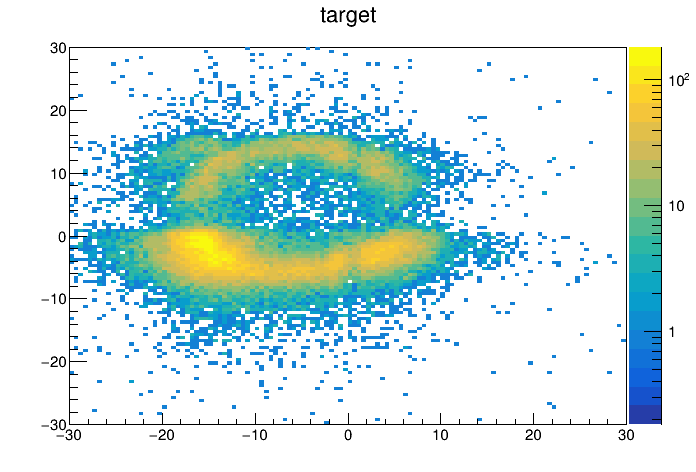

In [10]:
c1->Clear();
c1->SetLogz();
htarget->Draw("colz");
c1->Draw();

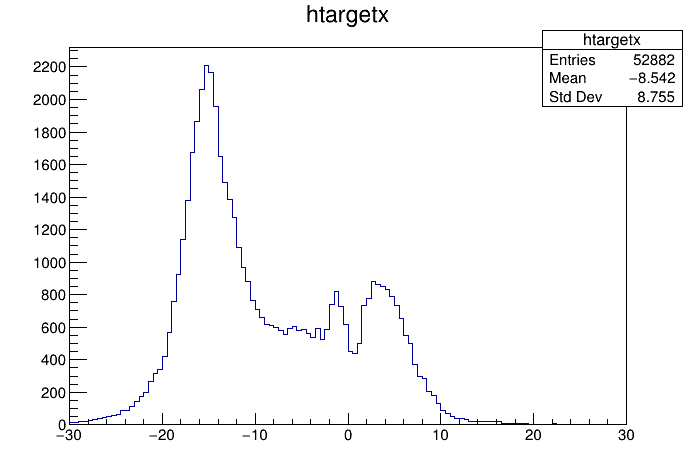

In [11]:
c1->Clear();
htargetx->Draw();
c1->Draw();

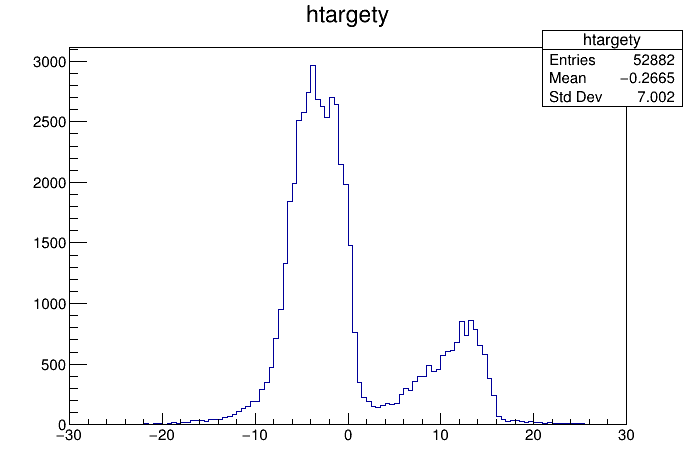

In [12]:
c1->Clear();
htargety->Draw();
c1->Draw();

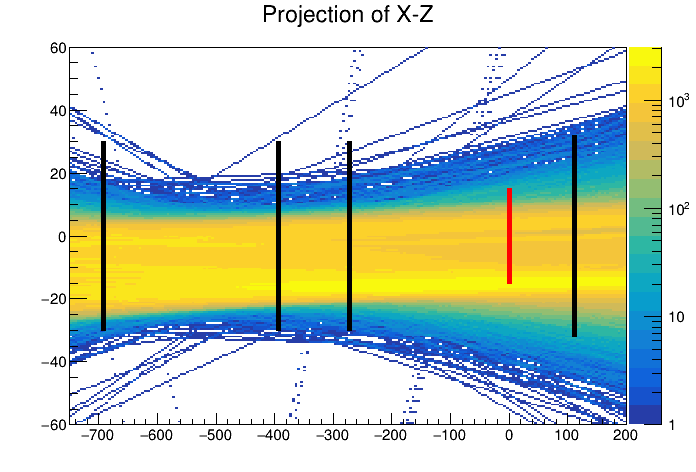

In [13]:
c1->Clear();
c1->SetLogz();
hxz->Draw("colz");
for(Int_t i=0;i<3;i++)nppac[i]->Draw();
target->Draw();
t0->Draw();
c1->Draw();

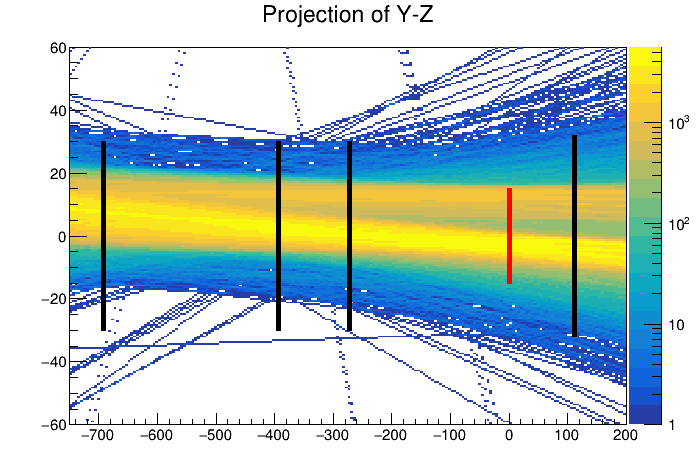

In [14]:
c1->Clear();
c1->SetLogz();
hyz->Draw("colz");
for(Int_t i=0;i<3;i++)nppac[i]->Draw();
target->Draw();
t0->Draw();
c1->Draw();

##### 